# Synthetic experiments 

Using synthetic DGPs for DRCT, we produce DOBS using Algorithm 2 from Gentzel et al. (2021) and
separately via our RCT rejection sampler.

In [2]:
from causal_eval.sampling import *

import seaborn as sns
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2 

In [3]:
# random seed for the sampling methods same throughout
rng = np.random.default_rng(10)

### Synthetic DGP Setting #1 
`|C| = 1, P (T = 1) = 0.3`

In [4]:
#######################
# DGP for RCT T->Y<-C
######################
num_samples = 100000

#keep the random seed for the DGP distinct from the sampling seed 
rng_dgp = np.random.default_rng(0)

C = rng_dgp.binomial(1, 0.5, num_samples)
T = rng_dgp.binomial(1, 0.3, num_samples)
Y = 0.5*C + 1.5*T + 2*T*C + rng_dgp.normal(0, 1, num_samples)
data = pd.DataFrame({"C": C, "T": T, "Y": Y})

# perform some sanity checks
# in the RCT data we should see unadjusted == adjusted 
rct_ace =  parametric_backdoor(data, "Y", "T", [])
print("RCT ACE unadjusted", rct_ace)
print("RCT ACE adjusting for C", parametric_backdoor(data, "Y", "T", ["C", "T*C"]))

RCT ACE unadjusted 2.4809951502961516
RCT ACE adjusting for C 2.4864917936261794


In [5]:
# Use the same parameters for the researcher-specified confouding functions for both sampling approaches
confound_func_params={"para_form": "linear"} 

In the cell below, we calculate the absolute bias (abs. bias) between ATE from DRCT and the estimated ATE via backdoor adjustment on DOBS created by each sampling algorithm. We also report abs. bias relative to the RCT ATE
(rel. abs. bias) and the mean and standard deviation (std.) across samples from 1000 random seeds.

#### Confidence Intervals 

We can construct confidence intervals via bootstrapping. We follow these steps: 

1. Use sampling (RCT rejection or Gentzel) to create data sample $S$
2. Bootstrapping: resample $S$ with replacement $b$ times. 
3. Calculate the ACE for each bootstrap sample. 
4. Use the percentile method to obtain 95% confidence intervals. 

In [29]:
# Dev: make sure bootstrapping and CI coverage working properly 
rct_out = bootstrapping_with_ace(data, is_rct=True, is_linear=True)
cacluate_ci_coverage(rct_out, rct_ace)

1

In [30]:
data_out1 = bootstrapping_three_methods_linear(data, rct_ace, confound_func_params)

[(0.018950371086305484, 0.02700825511520133, 0.026777362890934686), (0.018799315894154844, 0.02567873338015003, 0.02517624848115929)]


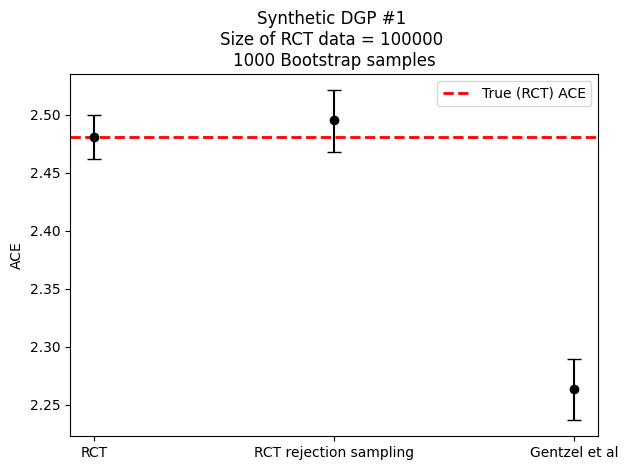

In [31]:
title = f"Synthetic DGP #1 \nSize of RCT data = {len(data)} \n1000 Bootstrap samples"
plot_bootstrap(data_out1, rct_ace, title);

We'll do the same thing with a smaller number of original samples. 

In [32]:
num_samples = 3000

In [33]:
#######################
# DGP for RCT T->Y<-C
######################

#keep the random seed for the DGP distinct from the sampling seed 
rng_dgp = np.random.default_rng(0)

C = rng_dgp.binomial(1, 0.5, num_samples)
T = rng_dgp.binomial(1, 0.3, num_samples)
Y = 0.5*C + 1.5*T + 2*T*C + rng_dgp.normal(0, 1, num_samples)
data = pd.DataFrame({"C": C, "T": T, "Y": Y})

# perform some sanity checks
# in the RCT data we should see unadjusted == adjusted 
rct_ace =  parametric_backdoor(data, "Y", "T", [])
print("RCT ACE unadjusted", rct_ace)
print("RCT ACE adjusting for C", parametric_backdoor(data, "Y", "T", ["C", "T*C"]))

RCT ACE unadjusted 2.541418640823207
RCT ACE adjusting for C 2.5318633267482284


In [35]:
data_out2 = bootstrapping_three_methods_linear(data, rct_ace, confound_func_params)

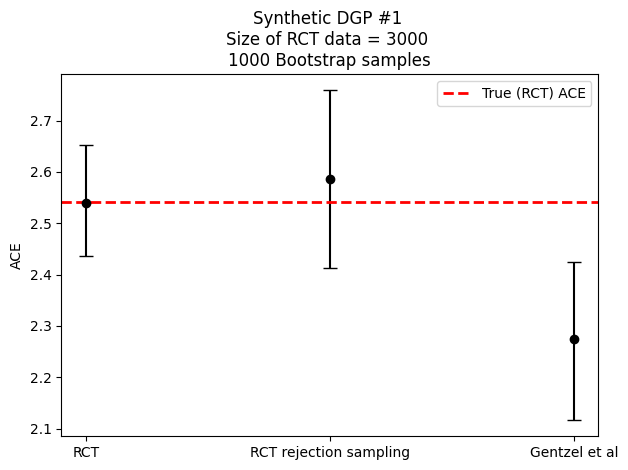

In [36]:
title = f"Synthetic DGP #1 \nSize of RCT data = {len(data)} \n1000 Bootstrap samples"
plot_bootstrap(data_out2, rct_ace, title);

In [ ]:
# Katie: commenting just for the confidence interval dev
#_ =  many_seeds(data, rct_ace, confound_func_params, is_linear=True, num_seeds=1000)

### Synthetic DGP Setting #2 
`|C| = 1, P (T = 1) = 0.5 `

In [ ]:
#######################
# DGP for RCT T->Y<-C
######################
num_samples = 100000

#keep the random seed for the DGP distinct from the sampling seed 
rng_dgp = np.random.default_rng(0)

C = rng_dgp.binomial(1, 0.5, num_samples)
T = rng_dgp.binomial(1, 0.5, num_samples) #Set P(T=1)=0.5
Y = 0.5*C + 1.5*T + 2*T*C + rng_dgp.normal(0, 1, num_samples)
data = pd.DataFrame({"C": C, "T": T, "Y": Y})

# perform some sanity checks
# in the RCT data we should see unadjusted == adjusted 
rct_ace =  parametric_backdoor(data, "Y", "T", [])
print("RCT ACE unadjusted", rct_ace)
print("RCT ACE adjusting for C", parametric_backdoor(data, "Y", "T", ["C", "T*C"]))

The cell below gives the results for the two different sampling algorithms for the synthetic DGP setting in the cell above across 1000 random seeds. 

In [ ]:
confound_func_params={"para_form": "linear"} 
_ = many_seeds(data, rct_ace, confound_func_params, is_linear=True, num_seeds=1000)

### Synthetic DGP Setting #3 
`|C| = 5, Nonlinear`

In [ ]:
# DGP
num_samples = 100000
rng_dgp = np.random.default_rng(0)

#keep the random seed for the DGP distinct from the sampling seed 
rng_dgp = np.random.default_rng(0)

C1 = rng_dgp.binomial(1, 0.5, num_samples)
C2 = C1 + rng_dgp.uniform(-0.5, 1, num_samples)
C3 = rng_dgp.normal(0, 1, num_samples)
C4 = rng_dgp.normal(0, 1, num_samples)
C5 = C3 + C4 + rng_dgp.normal(0, 1, num_samples)
T = rng_dgp.binomial(1, 0.3, num_samples)
Y = 0.5*C4 + 2*T*C1*C2 - 1.5*T + C2*C3 + C5 + rng_dgp.normal(0, 1, num_samples)
data = pd.DataFrame({"C1": C1, "C2": C2, "C3": C3, "C4": C4, "C5": C5, "T": T, "Y": Y})
print("RCT ACE", np.mean(data[data['T'] == 1]["Y"]) - np.mean(data[data['T'] == 0]["Y"]))

In [ ]:
rct_ace =  parametric_backdoor(data, "Y", "T", [])
print("RCT ACE unadjusted", rct_ace)
print("RCT ACE adjusting for C ", parametric_backdoor(data, "Y", "T", []))

The cell below gives the results for the two different sampling algorithms for the synthetic DGP setting in the cell above across 1000 random seeds. 

In [ ]:
confound_func_params = {"para_form": "nonlinear", "C1": 1.5, "C2": -0.7, "C3": 1.2, "C4": 1.5, "C5": -1.2}
_ = many_seeds(data, rct_ace, confound_func_params, is_linear=False, num_seeds=1000)